In [62]:
from collections import OrderedDict

import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [68]:
model: OrderedDict = torch.load('../data/fax_model_final.pth')
for k, v in list(model.items())[:5] + list(model.items())[-5:]:
    print(f'Parameter: {k}, Size: {v.size()}')

Parameter: stage_emb.weight, Size: torch.Size([6, 4])
Parameter: character_emb.weight, Size: torch.Size([27, 12])
Parameter: action_emb.weight, Size: torch.Size([396, 32])
Parameter: transformer.proj_down.weight, Size: torch.Size([512, 158])
Parameter: transformer.proj_down.bias, Size: torch.Size([512])
Parameter: shoulder_head.0.bias, Size: torch.Size([560])
Parameter: shoulder_head.1.weight, Size: torch.Size([280, 560])
Parameter: shoulder_head.1.bias, Size: torch.Size([280])
Parameter: shoulder_head.3.weight, Size: torch.Size([3, 280])
Parameter: shoulder_head.3.bias, Size: torch.Size([3])


In [ ]:
train_losses = np.load('../data/train_losses.npy')
val_losses = np.load('../data/val_losses.npy')

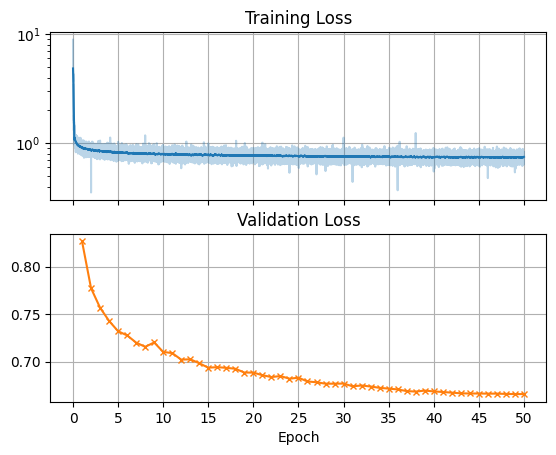

In [65]:
fig, (tax, vax) =  plt.subplots(2, 1, sharex=True)

tax.plot(train_losses, color='C0', alpha=.3)
tax.plot(savgol_filter(train_losses, 501, 3), color='C0')
tax.set_yscale('log')
tax.set_title('Training Loss')
tax.grid()

epoch_len = train_losses.shape[0] // val_losses.shape[0]
val_x = np.arange(epoch_len, train_losses.shape[0]+1, epoch_len)
vax.plot(val_x, val_losses, marker='x', markersize=5, color='C1')
vax.set_xlabel('Epoch')
vax.set_xticks(np.arange(0, val_losses.shape[0]+1, 5)*epoch_len)
vax.set_xticklabels(np.arange(0, val_losses.shape[0]+1, 5))
vax.set_title('Validation Loss')
vax.grid()
